### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil

# Local imports
import analysis_functions

# Apply better style
analysis_functions.apply_heatmap_style()


### Plot tune scan

In [2]:
# Define study
STUDY_NAME = "tune_scan_start_of_levelling_reprod"
COLLIDER = "base_collider"
PARQUET_PATH = f"../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# Load dataframe
df = pd.read_parquet(f"../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

df


name base collider  normalized amplitude in xy-plane  \
beam  qx    qy                                                             
lhcb1 62.30 60.3025      base_collider                             4.000   
            60.3050      base_collider                             4.000   
            60.3075      base_collider                             4.000   
            60.3100      base_collider                             4.000   
            60.3125      base_collider                             4.000   
...                                ...                               ...   
      62.33 60.3075      base_collider                             5.406   
            60.3100      base_collider                             4.875   
            60.3125      base_collider                             6.062   
            60.3150      base_collider                             7.219   
            60.3275      base_collider                             4.188   

                        qx      qy   dqx   dqy  i_bunch_b1  i_bunch_b2  \
beam  qx    qy                                                           
lhcb1 62.30 60.3025  62.30  60.302  15.0  15.0       150.0       147.0   
            60.3050  62.30  60.305  15.0  15.0       150.0       147.0   
            60.3075  62.30  60.308  15.0  15.0       150.0       147.0   
            60.3100  62.30  60.310  15.0  15.0       150.0       147.0   
            60.3125  62.30  60.312  15.0  15.0       150.0       147.0   
...                    ...     ...   ...   ...         ...         ...   
      62.33 60.3075  62.33  60.308  15.0  15.0       150.0       147.0   
            60.3100  62.33  60.310  15.0  15.0       150.0       147.0   
            60.3125  62.33  60.312  15.0  15.0       150.0       147.0   
            60.3150  62.33  60.315  15.0  15.0       150.0       147.0   
            60.3275  62.33  60.328  15.0  15.0       150.0       147.0   

                     i_oct_b1  i_oct_b2  num_particles_per_bunch  \
beam  qx    qy                                                     
lhcb1 62.30 60.3025    -300.0    -300.0             2.200000e+11   
            60.3050    -300.0    -300.0             2.200000e+11   
            60.3075    -300.0    -300.0             2.200000e+11   
            60.3100    -300.0    -300.0             2.200000e+11   
            60.3125    -300.0    -300.0             2.200000e+11   
...                       ...       ...                      ...   
      62.33 60.3075    -300.0    -300.0             2.200000e+11   
            60.3100    -300.0    -300.0             2.200000e+11   
            60.3125    -300.0    -300.0             2.200000e+11   
            60.3150    -300.0    -300.0             2.200000e+11   
            60.3275    -300.0    -300.0             2.200000e+11   

                     crossing_angle  
beam  qx    qy                       
lhcb1 62.30 60.3025           250.0  
            60.3050           250.0  
            60.3075           250.0  
            60.3100           250.0  
            60.3125           250.0  
...                             ...  
      62.33 60.3075           250.0  
            60.3100           250.0  
            60.3125           250.0  
            60.3150           250.0  
            60.3275           250.0  

[143 rows x 12 columns]

In [3]:
# Reshape for plotting
df_to_plot = df.pivot(index="qy", columns="qx", values="normalized amplitude in xy-plane")
df_to_plot

qx,62.300,62.302,62.305,62.308,62.310,62.312,62.315,62.318,62.320,62.322,62.325,62.328,62.330
qy,,,,,,,,,,,,,
60.300,NaN,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.031,4.000,4.000,4.000
60.302,4.000,NaN,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.031,4.031
60.305,4.000,4.000,NaN,4.000,4.000,4.000,4.094,4.000,4.031,4.156,4.062,4.250,4.062
60.308,4.000,4.000,4.000,NaN,4.000,4.500,4.875,5.188,5.750,5.531,5.812,4.969,5.406
60.310,4.000,4.000,4.000,4.000,NaN,4.531,4.406,5.375,5.500,5.500,5.281,5.062,4.875
60.312,4.000,4.000,4.031,4.031,4.344,NaN,4.219,5.000,5.094,5.344,6.031,6.281,6.062
60.315,4.000,4.000,4.031,4.031,4.000,4.781,NaN,5.688,6.312,7.406,7.250,7.594,7.219
60.318,4.031,4.000,4.125,4.531,4.938,5.219,5.125,NaN,6.875,NaN,NaN,NaN,NaN
60.320,4.125,4.062,4.000,4.469,4.500,5.281,5.438,7.000,NaN,7.844,NaN,NaN,NaN


In [4]:
# Replace NaNs above the upper diagonal with 8
for qx in df_to_plot.columns:
    for qy in df_to_plot.index:
        if qy >= qx - 2 + 0.004:
            if pd.isna(df_to_plot.loc[qy, qx]):
                df_to_plot.loc[qy, qx] = 8

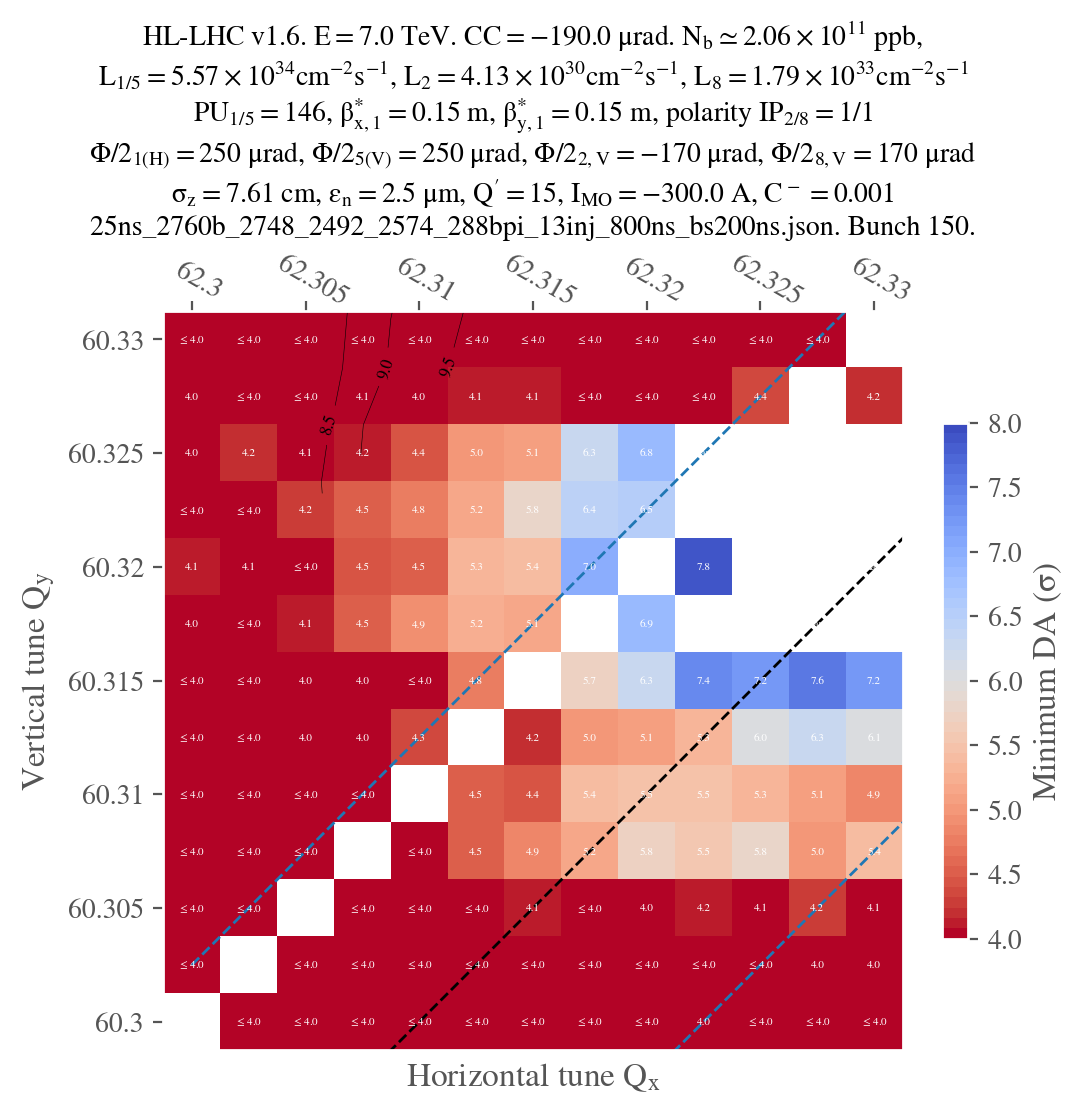

In [5]:
# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    f'{STUDY_NAME}_{COLLIDER}',
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flathv",
    betx=0.15,
    bety=0.15,
    Nb=True,
    green_contour=6.,
    extended_diagonal=False,
    vmin=4.,
    vmax=8.0,
    CC = True,
)
# ! Verified
